# web sitesinde geçen zaman hesaplanmak isteniyor

## elimizdeki verilere göre web sitemizde gerçekten geçirilen ort. zaman 170 sn. mi.

In [1]:
import numpy as np

In [2]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [3]:
olcumler[:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [12]:
import scipy.stats as stats

In [13]:
import pandas as pd

In [14]:
df=pd.DataFrame(olcumler)

In [15]:
df.head()

,0
0,17
1,160
2,234
3,149
4,145


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,50.0,154.38,50.774367,17.0,120.25,154.5,194.75,251.0


In [19]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

# normallik varsayımı incelemesi yapmalıyız

## histogram ve qqplot ile gözle normallik incelemesi

<AxesSubplot:ylabel='Frequency'>

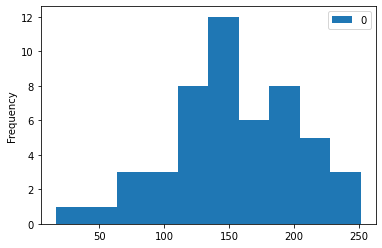

In [23]:
df.plot.hist()

In [25]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

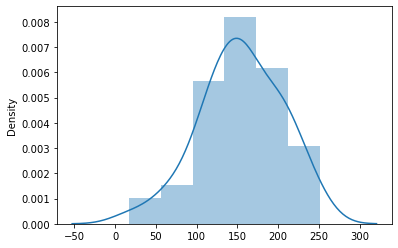

In [27]:
sns.distplot(df)

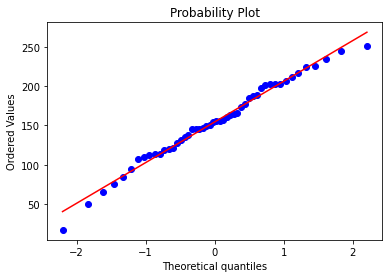

In [28]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

## Shapiro-Wilks Testi ile normallik incelemesi

H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur

H1: ... fark vardır

In [30]:
from scipy.stats import shapiro

In [31]:
shapiro(df)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [32]:
print("T Hesap İstatistiği: " + str(shapiro(df)[0]))
print("Hesaplanan P-value: " + str(shapiro(df)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


### hesaplanan p-value değeri 0.5 den büyük olduğu için h0 hipotezimizi reddedemiyoruz

## hipotez testinin yapılması

In [33]:
stats.ttest_1samp(df,popmean=170)

Ttest_1sampResult(statistic=array([-2.1753118]), pvalue=array([0.03446042]))

H0: Web sitemizde geçirilen ortalama süre 170'tir

H1: .. değildir

hesaplanan p-value değeri 0.5 den küçük olduğu için h0 hipotezimizi reddedilir.

## _YANİ WEBSİTESİNDE GEÇİRİLEN SÜRE 170 DEĞİLDİR_